In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import community
import community.community_louvain as community_louvain
import networkx as nx
import random
import collections

In [2]:
def data_graph(dataset, delimiter):
    
    data = pd.read_csv(dataset, delimiter=delimiter)
    print(data.shape)
    print(data.head(5))
    data.columns = ['From','To','Weight']
    # We check if the file has loaded
    data.head()
    
    graph = nx.DiGraph()
    # Adding the edges.
    for index,row in data.iterrows():
        graph.add_edges_from([(row[0],row[1])],weight = row[2])
    
    return data, graph

In [3]:
epi_csv, graph = data_graph('epinion.txt',"\t")

(841372, 3)
   Source  Destination  Weight
0       0            1      -1
1       1       128552      -1
2       2            3       1
3       4            5      -1
4       4          155      -1


In [26]:
def stats(data,graph):
    # Number of nodes
    print(graph.number_of_nodes())

    # Number of edges
    print(graph.number_of_edges())

    # Positive and negative edges 

    Stats = pd.DataFrame(graph.out_degree(),columns=['From','Outdegree']).sort_values('From')
    Stats_2 =  pd.DataFrame(graph.in_degree(),columns=['To','Indegree']).sort_values('To')
    b= data.groupby('From',as_index=False)[['Weight']].sum().sort_values('From')
    c= data.groupby('To',as_index=False)[['Weight']].sum().sort_values('To')
    Stats = Stats.merge(b,on='From',how='left')
    Stats_2 = Stats_2.merge(c,on='To',how='left')
    Stats['Pos_out'] = (  Stats['Outdegree'] + Stats['Weight']  )/2
    Stats['Neg_out'] = (  Stats['Outdegree'] - Stats['Weight']  )/2
    Stats_2['Pos_in']= (Stats_2['Indegree']  + Stats_2['Weight'])/2
    Stats_2['Neg_in']= (Stats_2['Indegree']  - Stats_2['Weight'])/2
    Stats = pd.merge(Stats,Stats_2,left_on='From', right_on='To').drop('To', axis=1)
    Stats = Stats.drop(['Weight_x','Weight_y'],axis=1)
    Stats.fillna(0,inplace=True)
    print(Stats.head())
    
    Stats.describe()
    print(Stats.max(axis=0))
    
    print(graph.number_of_edges())
    print(graph.number_of_nodes())
    print(nx.average_clustering(graph))
    print(nx.transitivity(graph))
    print(nx.density(graph))
    
    data['Weight'].plot.hist(bins=2, alpha=1)
    plt.xlabel('')
    plt.show()
    
    return Stats

131828
841372
   From  Outdegree  Pos_out  Neg_out  Indegree  Pos_in  Neg_in
0     0          1      0.0      1.0         0     0.0     0.0
1     1          1      0.0      1.0         2     1.0     1.0
2     2          1      1.0      0.0         1     1.0     0.0
3     3          0      0.0      0.0         4     4.0     0.0
4     4         14      9.0      5.0         1     1.0     0.0
From         131827.0
Outdegree      2070.0
Pos_out        2070.0
Neg_out        1562.0
Indegree       3478.0
Pos_in         3338.0
Neg_in          540.0
dtype: float64
841372
131828
0.09561744905322256
0.07428166527700729
4.841456374018419e-05


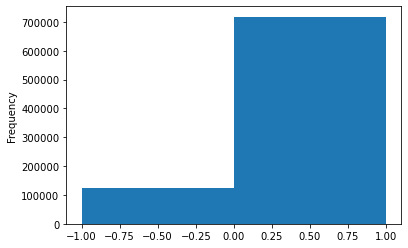

In [27]:
Stats = stats(epi_csv,graph)

In [8]:
def degreeDistribution(data,graph):
    
    degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    print(degreeCount)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots(figsize=(12, 9))
    plt.plot(deg,cnt,color="#3F5D7D")
    plt.xlabel('In-Degree /Number of Connections')
    plt.ylabel('Number of nodes')
    plt.title('Actual Plot')
    plt.show()
    print()
    plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
    plt.xlabel('In-Degree /Number of Connections')
    plt.ylabel('Number of nodes')
    plt.title('Log Plot')
    plt.show()
    
    # Degree distribtion for out-degree
    degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    print(degreeCount)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots(figsize=(12, 9))
    plt.plot(deg,cnt,color="#3F5D7D")
    plt.xlabel('Out-Degree /Number of Connections')
    plt.ylabel('Number of nodes')
    plt.show()

    print()
    plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
    plt.xlabel('Out-Degree /Number of Connections')
    plt.ylabel('Number of nodes')
    plt.title('Log Plot')
    plt.show()



Counter({0: 47227, 1: 39613, 2: 12764, 3: 6687, 4: 4191, 5: 2964, 6: 2173, 7: 1667, 8: 1310, 9: 1081, 10: 878, 11: 749, 12: 624, 13: 560, 14: 501, 15: 457, 16: 384, 17: 365, 20: 295, 19: 281, 18: 262, 21: 245, 22: 224, 23: 203, 24: 198, 27: 161, 25: 159, 26: 158, 30: 146, 28: 142, 29: 140, 31: 138, 34: 131, 36: 122, 32: 118, 33: 114, 39: 109, 35: 103, 37: 96, 41: 93, 40: 91, 44: 87, 38: 86, 43: 79, 42: 73, 47: 71, 46: 69, 45: 65, 51: 60, 58: 52, 50: 52, 48: 52, 56: 49, 49: 49, 60: 48, 54: 47, 55: 46, 52: 45, 66: 44, 57: 44, 53: 44, 62: 43, 77: 42, 74: 40, 63: 39, 65: 38, 61: 38, 73: 36, 68: 33, 64: 33, 59: 33, 87: 32, 71: 32, 94: 31, 80: 31, 75: 31, 84: 30, 67: 30, 81: 29, 100: 28, 82: 28, 76: 28, 72: 28, 93: 27, 89: 27, 70: 26, 69: 26, 88: 24, 79: 24, 103: 23, 97: 23, 86: 23, 78: 23, 114: 21, 106: 21, 96: 21, 83: 21, 102: 20, 91: 20, 129: 19, 105: 19, 95: 19, 99: 18, 85: 18, 118: 17, 111: 17, 92: 17, 90: 17, 134: 16, 133: 16, 124: 16, 116: 16, 112: 16, 108: 16, 104: 16, 120: 15, 169: 

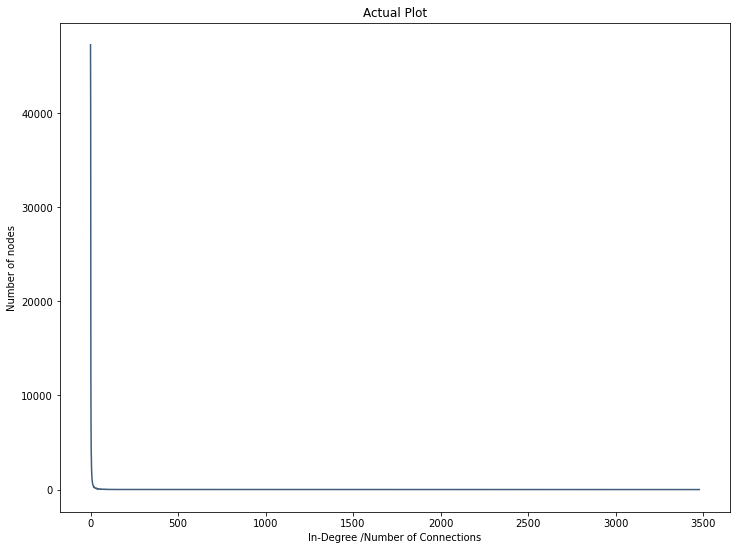

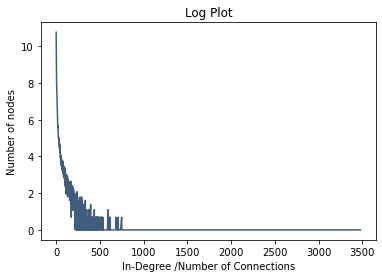

Counter({1: 52848, 0: 36510, 2: 12685, 3: 6044, 4: 3694, 5: 2601, 6: 1987, 7: 1400, 8: 1085, 9: 953, 10: 739, 11: 665, 12: 575, 13: 493, 14: 448, 15: 413, 16: 372, 17: 329, 19: 286, 18: 275, 21: 244, 20: 243, 22: 214, 23: 196, 24: 190, 25: 171, 26: 157, 27: 155, 28: 148, 29: 145, 30: 141, 33: 139, 31: 128, 32: 123, 35: 114, 34: 108, 40: 106, 41: 101, 37: 101, 36: 101, 38: 99, 44: 92, 39: 90, 43: 86, 42: 82, 53: 70, 47: 70, 48: 68, 46: 68, 50: 67, 45: 65, 54: 64, 52: 62, 59: 59, 57: 59, 66: 56, 51: 56, 49: 56, 67: 53, 58: 52, 73: 50, 63: 50, 65: 49, 74: 48, 64: 47, 76: 44, 56: 43, 55: 43, 60: 42, 72: 40, 62: 40, 61: 39, 71: 38, 68: 38, 69: 36, 82: 35, 83: 34, 70: 33, 81: 32, 79: 31, 101: 30, 100: 30, 85: 30, 78: 30, 77: 30, 96: 28, 94: 28, 84: 28, 75: 28, 99: 27, 118: 26, 88: 26, 87: 26, 107: 25, 86: 25, 108: 24, 98: 24, 97: 24, 91: 24, 89: 24, 111: 23, 110: 23, 109: 23, 93: 23, 102: 22, 127: 21, 104: 21, 95: 21, 92: 21, 90: 21, 106: 20, 120: 18, 125: 17, 149: 16, 133: 16, 117: 16, 115:

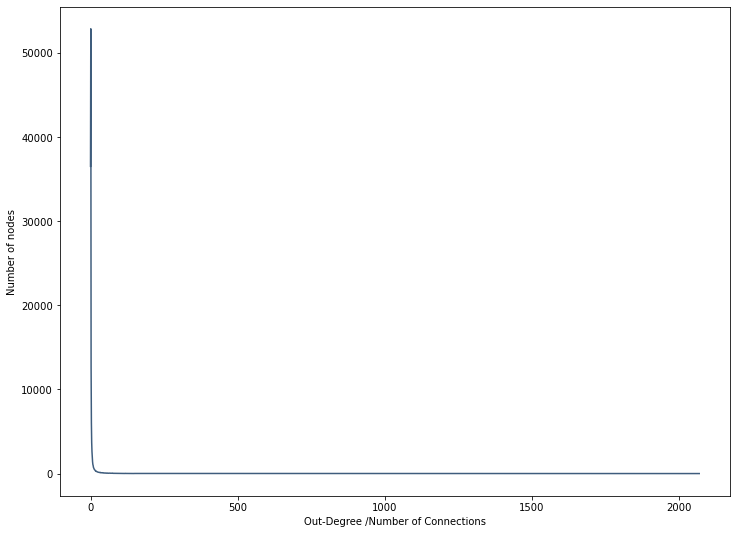

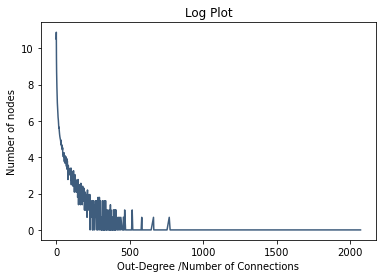

In [9]:
degreeDistribution(epi_csv,graph)

In [21]:
def degreeCentrality(graph):
    # Degree centrality stats
    print("In-degree")
    in_degree_centrality_nodes = nx.in_degree_centrality(graph)
    in_degree_centrality_nodes = collections.Counter(in_degree_centrality_nodes)
    for k, v in in_degree_centrality_nodes.most_common(10):
        print ((k, v))
    with open('indegreecentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in in_degree_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count))  
    print("\n Out-degree \n")
    out_degree_centrality_nodes = nx.out_degree_centrality(graph)
    out_degree_centrality_nodes = collections.Counter(out_degree_centrality_nodes)
    for k, v in out_degree_centrality_nodes.most_common(10):
        print ((k, v))
    with open('outdegreecentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in out_degree_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
    # degree_centrality_nodes = nx.degree_centrality(graph)
    # degree_centrality_nodes = collections.Counter(degree_centrality_nodes)
    # for k, v in degree_centrality_nodes.most_common(100):
    #   print (k,v)


In [22]:
def eigenVectorCentrality(graph):
    # Eigen Vector centrality stats
    print("Eigen Vector centrality")
    eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
    eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
    for k, v in eigenvector_centrality_nodes.most_common(10):
        print ((k, v))
    with open('eigenvectorcentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in eigenvector_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 


In [23]:
def khatzCentrality(graph):
    # Katz centrality stats
    # Not running on colab
    print("Katz centrality")
    katz_centrality_numpy_nodes = nx.katz_centrality_numpy(graph)
    katz_centrality_numpy_nodes = collections.Counter(katz_centrality_numpy_nodes)
    for k, v in katz_centrality_numpy_nodes.most_common(10):
      print ((k, v))
    with open('khatzcentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in katz_centrality_numpy_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 

In [24]:
def closenessCentrality(graph):
    # Closeness centrality stats
    # Not running on colab
    print("closeness centrality ")
    closeness_centrality_nodes = nx.closeness_centrality(graph)
    closeness_centrality_nodes = collections.Counter(closeness_centrality_nodes)
    for k, v in closeness_centrality_nodes.most_common(10):
        print ((k, v))
    with open('closenesscentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in closeness_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 

In [25]:
def betweenessCentrality(graph):
    # Betweenness centrality stats
    # Not running on colab
    print("Betweenness centrality ")
    betweenness_centrality_nodes = nx.betweenness_centrality(graph)
    betweenness_centrality_nodes = collections.Counter(betweenness_centrality_nodes)
    for k, v in betweenness_centrality_nodes.most_common(10):
        print ((k, v))
    with open('betweennessscentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in betweenness_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 

In [29]:
def degreeRelationship(Stats, graph):
    # Out degree and indegree relationship, relationship between positive and negative weighted outgoing 
    # edges in the network and relationship between positive and negative ingoing edges.
    plt.figure(figsize=(4,4))
    plt.plot(Stats['Pos_out'],Stats['Neg_out'],'ro',markersize=0.25)
    plt.xscale('log')
    plt.yscale('log')
    
    
    
    plt.figure(figsize=(4,4))
    plt.plot(Stats['Pos_in'],Stats['Neg_in'],'ro',markersize=0.25)
    plt.xscale('log')
    plt.yscale('log')
    
    
    
    plt.figure(figsize=(5,5))
    plt.plot(Stats['Outdegree'],Stats['Indegree'],'ro',markersize=0.4)
    plt.xscale('log')
    plt.yscale('log')
    
    
    
    Deg_cor = nx.average_neighbor_degree(graph,target='out')
    dict_list = []
    for key, value in Deg_cor.items():
        temp = [key,value]
        temp[0] = graph.degree(key,'out')
        dict_list.append(temp)
    dfa1 = pd.DataFrame(dict_list,columns =['Outdegree','Average neighbors outdegree'])
    dfa2 = dfa1.groupby('Outdegree',as_index=False)['Average neighbors outdegree'].mean()
    plt.plot(dfa1['Outdegree'],dfa1['Average neighbors outdegree'],'ro',markersize=0.3)
    plt.plot(dfa2['Outdegree'],dfa2['Average neighbors outdegree'],'bo',markersize=1)
    plt.xscale('log')
    plt.yscale('log')
    
    
    
    Deg_cor = nx.average_neighbor_degree(graph,target='in')
    dict_list = []
    for key, value in Deg_cor.items():
        temp = [key,value]
        temp[0] = graph.degree(key,'in')
        dict_list.append(temp)
    dfa1 = pd.DataFrame(dict_list,columns =['Indegree','Average neighbors indegree'])
    dfa2 = dfa1.groupby('Indegree',as_index=False)['Average neighbors indegree'].mean()
    plt.plot(dfa1['Indegree'],dfa1['Average neighbors indegree'],'ro',markersize=0.3)
    plt.plot(dfa2['Indegree'],dfa2['Average neighbors indegree'],'bo',markersize=1)

    plt.xscale('log')
    plt.yscale('log')
    
    
    
    print(nx.degree_assortativity_coefficient(graph,'in','in'))
    print(nx.degree_assortativity_coefficient(graph,'out','out'))
    print(nx.degree_assortativity_coefficient(graph))
    

In [30]:
def weakConnected(graph):
    weak = nx.weakly_connected_components(graph)
    weak_list = [c for c in sorted(weak,key=len, reverse=True)]
    weak_nodes = weak_list[0]
    weak_graph = graph.subgraph(weak_nodes)
    return weak_graph

In [31]:
def powerLaw(Stats, graph):
    import math
    pos = Stats['Indegree'][Stats['Indegree'] != 0]
    pos = pos.transform(lambda x: math.floor(math.log(x)) )

    prob = pos.value_counts(normalize=True)
    threshold = 0.0001
    mask = prob > threshold
    tail_prob = prob.loc[~mask].sum()
    prob = prob.loc[mask]
    prob['other'] = tail_prob
    prob.plot(kind='bar',log=True,color='r')
    
    import igraph
    pos = Stats['Indegree'][Stats['Indegree'] != 0]
    igraph.power_law_fit(pos)
    
    print(nx.degree_assortativity_coefficient(graph,'in'))
    print(nx.degree_assortativity_coefficient(graph,'out'))
    print(nx.degree_assortativity_coefficient(graph))

In [32]:
def communities(graph):
    SCC = max(nx.strongly_connected_components(graph), key=len)
    print('Size of maximal strongly connected component is ' + str(len(SCC)))
    WCC = max(nx.weakly_connected_components(graph), key=len)
    print('Size of maximal weakly connected component is ' + str(len(WCC)))
    DIF = list(set(WCC)-set(SCC))
    OUT_C = []
    IN_C = []
    IN = 0
    OUT = 0
    for index, node1 in enumerate(DIF):
        for index2, node2 in enumerate(SCC):

            if graph.has_edge(node1,node2):
                OUT+=1
                OUT_C.append(node2)
                break
            elif graph.has_edge(node2,node1):
                IN+=1
                IN_C.append(node1)
                break


    TND = len(DIF)-IN-OUT
    print(IN,OUT,TND)
    
    SCC = max(nx.strongly_connected_components(graph), key=len)
    scc_com = graph.subgraph(SCC).copy()
    scc2 = nx.Graph(scc_com)

    # Removing the weights.

    for u,v,d in scc2.edges(data=True):
        d['weight']=1

    communities =community_louvain.best_partition(scc2,random_state=5)
    
    print(set(communities.values()))
    
    ind_graph = community_louvain.induced_graph(communities, scc2)

    inv_map = dict()
    for key, value in communities.items():
        inv_map.setdefault(value, list()).append(key)

    # Removing the small communities

    inv_map2 = {key:val for key, val in inv_map.items() if len(val) >= 100}
    sizes = np.array([len(inv_map2[k]) for k in list(inv_map2.keys())])

    # Removing edges from the graph:

    inv_keys = [key for key in inv_map2]
    ind_nodes = list(ind_graph.nodes())
    for node in ind_nodes:
        if node not in inv_keys:
            ind_graph.remove_node(node)
            
    print(community_louvain.modularity(communities,scc2))
    print(sizes)

In [42]:
def richClubEffect(Stats):
    
    # We want to see the rich club effect in the 100 edges with the highest indegree.
    picked = 100
    rce1 = Stats[['From','Indegree']].sort_values(by=['Indegree'], ascending=False)[0:picked]
    rich = list(rce1.From.values)
    rece_graph = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 
    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1

        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


    plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
    plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
    plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    plt.legend(loc="upper right")
    plt.ylim((0,1))
    plt.xlim((-2,picked-2))
    plt.show()

    # Checking the one sidedness
    print(nx.reciprocity(rece_graph))
    
    
    
    # We want to see the rich club effect in the 100 edges with the highest negative_degree.
    picked = 100
    rce2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[4:picked+4]
    rich = list(rce2.From.values)
    rece_graph2 = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 

    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1


        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


    plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
    plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
    plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    plt.legend(loc="upper right")
    plt.ylim((0,1))
    plt.xlim((-1,picked-2))
    plt.show()
    
    # Checking the one sidedness
    print(nx.reciprocity(rece_graph2))
    
    
    
    # We want to see the rich club effect in the 100 edges with the highest outdegree.
    picked = 100
    rce3 = Stats[['From','Outdegree']].sort_values(by=['Outdegree'], ascending=False)[0:picked]
    rich = list(rce3.From.values)
    rece_graph3 = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 
    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1

        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


    plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
    plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
    plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    plt.legend(loc="upper right")
    plt.ylim((0,1))
    plt.xlim((-2,picked-2))
    plt.show()

    # Checking the one sidedness
    print(nx.reciprocity(rece_graph3))
    
    
    # We want to see the rich club effect in the 100 edges with the highest negitive outdegree.
    picked = 100
    rce4 = Stats[['From','Neg_out']].sort_values(by=['Neg_out'], ascending=False)[0:picked]
    rich = list(rce4.From.values)
    rece_graph4 = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 
    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1

        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


    plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
    plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
    plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    plt.legend(loc="upper right")
    plt.ylim((0,1))
    plt.xlim((-2,picked-2))
    plt.show()

    # Checking the one sidedness
    print(nx.reciprocity(rece_graph4))

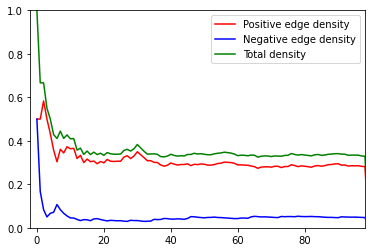

0.6515615431720759


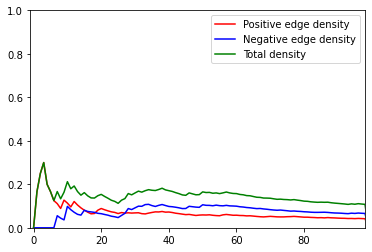

0.38847583643122674


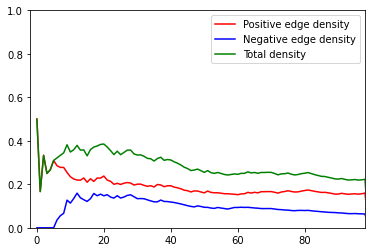

0.5227579990986931


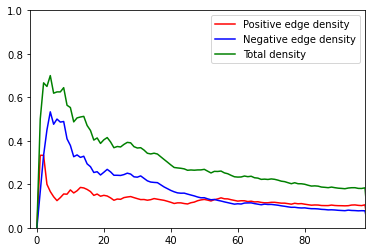

0.5313693398799781


In [43]:
richClubEffect(Stats)

In [44]:
def communitiesNewCode(graph):
    # compute the best partition
    partition = community_louvain.best_partition(graph)
    print(partition)
#     # draw the graph
#     pos = nx.spring_layout(graph)
#     # color the nodes according to their partition
#     cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
#     nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40,
#                            cmap=cmap, node_color=list(partition.values()))
#     nx.draw_networkx_edges(graph, pos, alpha=0.5)
#     plt.show()